In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
# Read the data
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter ='\t')

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place. 25 times,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# Clean the text by removing any extra characters 
import re # tools for cleaning text
import nltk # library to perform NLP
nltk.download('stopwords') # tool to remove the non-essential words. It is a list of words
from nltk.corpus import stopwords
# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Steps for cleaning the first review and apply for loop on all the reviews
df['Review'][0]
review = re.sub('[^a-zA-Z]', ' ', df['Review'][0]) # only keep the letters so what we dont want to remove
review = review.lower() # make all letters as lowercase 
review = review.split()  # split the review into separate words to create a list of words
ps =PorterStemmer()
review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))] # use set for larger text
review = ' '.join(review) # take the list of words back into the string

In [6]:
review

'wow love place time'

In [7]:
# Do the same steps for all the reviews in the dataset using the for loop
corpus = [] # Build a new list for all the words from all the reviews
# corpus is a collection of text and a common term used in NLP
for i in range (0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
corpus

['wow love place time',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'name',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid could happi

### Feature Extraction

### Bag of Words Model

In [9]:
# Create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)# We restrict the words to 1500 which keeps the most frequent words

In [10]:
X = cv.fit_transform(corpus).toarray()# independent variables

In [11]:
X[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
print(cv.get_feature_names())

['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'bbq', 'bean', 'beat',

In [13]:
X.shape

(1000, 1500)

In [14]:
X.dtype

dtype('int64')

In [15]:
y = df.iloc[:, 1].values # dependent variable (These are your Liked values from the dataset)

### Modeling
Naive Bayes Model

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

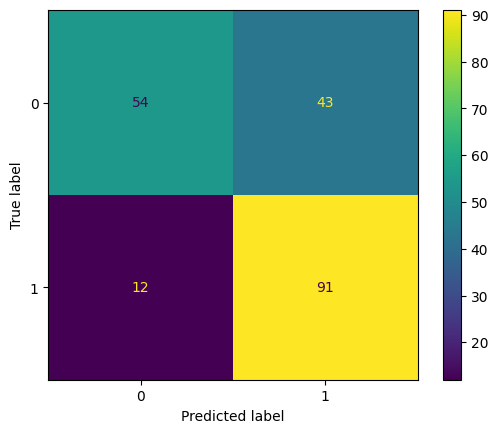

Test Data Accuracy: 0.7250


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))

In [18]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
# Evaluating the results
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

accuracy: 0.725
precision score: 0.6791044776119403
recall score: 0.883495145631068
F1 Score: 0.7679324894514767


### KNN Model

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

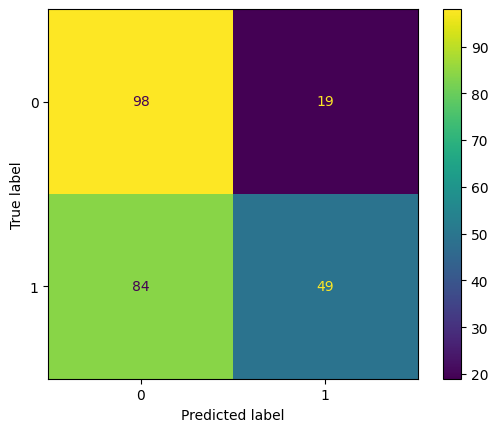

In [20]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [21]:
# Evaluating the results
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

accuracy: 0.588
precision score: 0.7205882352941176
recall score: 0.3684210526315789
F1 Score: 0.4875621890547263


### Support Vector Machine SVM Model

In [22]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

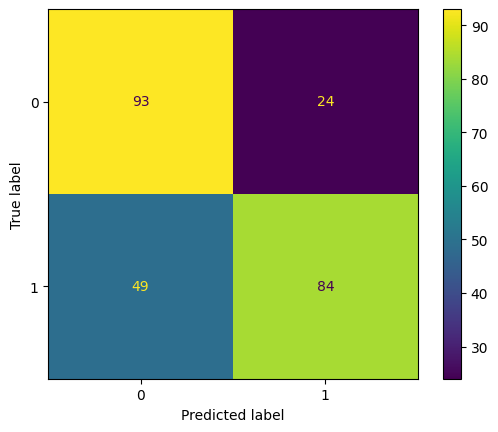

In [23]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [24]:
# Evaluating the results
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

accuracy: 0.708
precision score: 0.7777777777777778
recall score: 0.631578947368421
F1 Score: 0.6970954356846473


### Decision Tree Classification Model

In [25]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

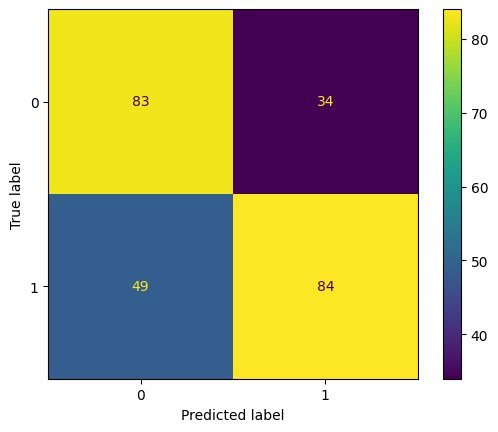

In [26]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [27]:
# Evaluating the results
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

accuracy: 0.668
precision score: 0.711864406779661
recall score: 0.631578947368421
F1 Score: 0.6693227091633466


### Random Forest Model

In [28]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

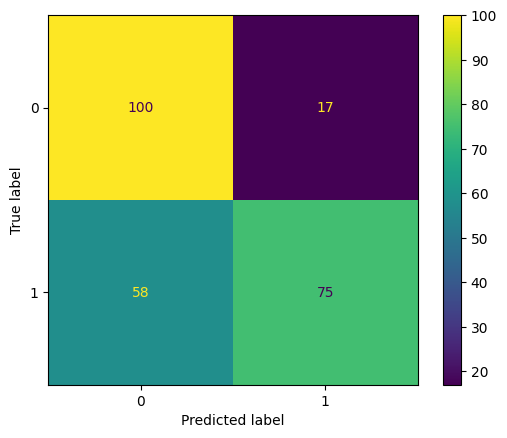

In [29]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [30]:
# Evaluating the results
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

accuracy: 0.7
precision score: 0.8152173913043478
recall score: 0.5639097744360902
F1 Score: 0.6666666666666666


### Feature Extraction
TF IDF

In [31]:
# Do the same steps for all the reviews in the dataset using the for loop
corpus1 = [] # Build a new list for all the words from all the reviews
# corpus is a collection of text and a common term used in NLP
for i in range (0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus1.append(review)

In [32]:
corpus1

['wow love place time',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'name',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid could happi

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8,lowercase=False)

In [34]:
corpus1 = vectorizer.fit_transform(corpus1).toarray()

In [35]:
print(vectorizer.get_feature_names())

['absolut', 'also', 'alway', 'amaz', 'ambianc', 'anoth', 'around', 'ask', 'atmospher', 'attent', 'awesom', 'back', 'bad', 'bar', 'beer', 'best', 'better', 'bit', 'bland', 'breakfast', 'buffet', 'burger', 'busi', 'came', 'check', 'chicken', 'chip', 'clean', 'cold', 'come', 'cook', 'could', 'custom', 'day', 'deal', 'definit', 'delici', 'dessert', 'dine', 'dinner', 'disappoint', 'dish', 'drink', 'eat', 'enjoy', 'enough', 'even', 'ever', 'everi', 'everyth', 'excel', 'expect', 'experi', 'famili', 'fantast', 'far', 'feel', 'felt', 'first', 'flavor', 'food', 'found', 'fresh', 'fri', 'friend', 'friendli', 'get', 'give', 'go', 'good', 'got', 'great', 'happi', 'help', 'hot', 'hour', 'impress', 'insid', 'know', 'lack', 'like', 'littl', 'look', 'lot', 'love', 'lunch', 'made', 'make', 'manag', 'mani', 'meal', 'meat', 'menu', 'minut', 'much', 'must', 'need', 'never', 'next', 'nice', 'night', 'noth', 'one', 'order', 'overal', 'owner', 'peopl', 'perfect', 'pizza', 'place', 'portion', 'potato', 'pretti

In [36]:
corpus1.shape

(1000, 179)

In [37]:
X =corpus1

In [38]:
X.shape

(1000, 179)

In [39]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.42408678],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Random Forest

In [40]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

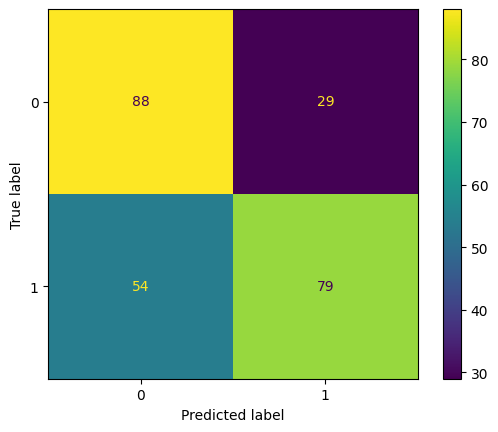

In [41]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [42]:
# Evaluating the results
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

accuracy: 0.668
precision score: 0.7314814814814815
recall score: 0.5939849624060151
F1 Score: 0.6556016597510373


### Decision Tree

In [43]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

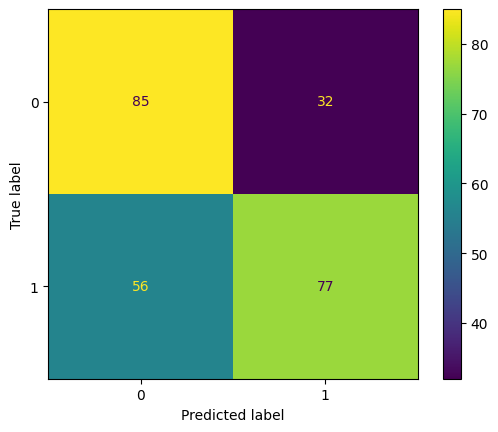

In [44]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [45]:
# Evaluating the results
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

accuracy: 0.648
precision score: 0.7064220183486238
recall score: 0.5789473684210527
F1 Score: 0.6363636363636364


### Support Vector Machine SVM Model

In [46]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

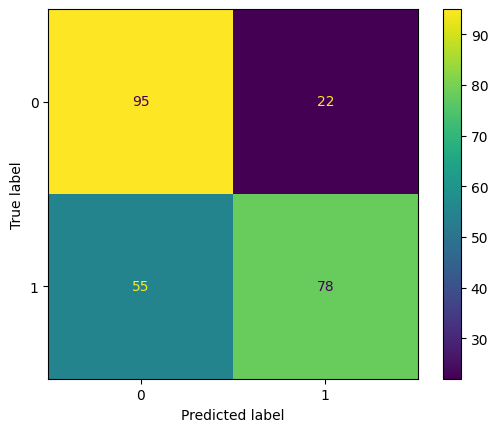

In [47]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [48]:
# Evaluating the results
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

accuracy: 0.692
precision score: 0.78
recall score: 0.5864661654135338
F1 Score: 0.669527896995708


### KNN Model

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

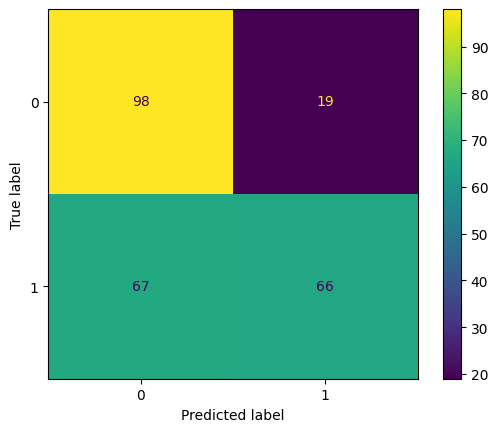

In [50]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [51]:
# Evaluating the results
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

accuracy: 0.656
precision score: 0.7764705882352941
recall score: 0.49624060150375937
F1 Score: 0.6055045871559632


### Naive Bayes Algorithm

In [52]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)



# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

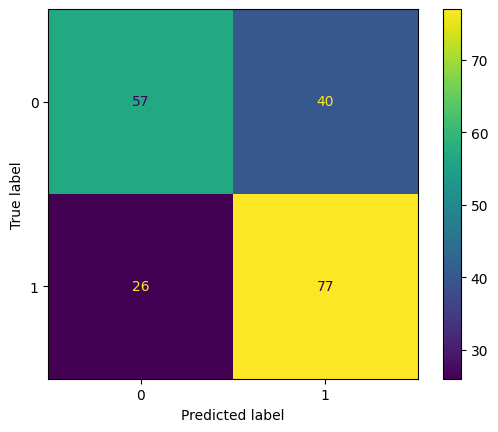

Test Data Accuracy: 0.6700


In [53]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))

In [54]:
# Evaluating the results
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

accuracy: 0.67
precision score: 0.6581196581196581
recall score: 0.7475728155339806
F1 Score: 0.7


Questions
What is Natural Language processing and why is it important in the context of data analysis in today’s world?

In the branch of artificial intelligence known as "natural language processing," a machine can precisely grasp the spoken word or a language in the same manner that a human can. Natural language processing is crucial in data analytics because it allows us to analyze user evaluations in their own language using sentiment analysis and allows machines to respond to people in their own language using chatbots.


What is the purpose of stopwords in NLP?

Stop words are words that are frequently used in any language, such as "is," "the," and "or," but which are unimportant during the text mining phase. This enables the machine to focus on important terms from the sentence by eliminating stop words.


What is the purpose of toarray() in the following code
X = cv.fit_transform(corpus).toarray()

Every word and sentence is translated into a vector form because machines cannot understand human languages, and by giving an array to the model, which can interpret the text's actual meaning, the machine expects data to be in numeric form.

Evaluate the performance of each of these models. Create a table to highlight the differences across both the approaches.
Which model predicts the best ?

In [55]:
import pandas as pd

data = {
  "Models": [ 'Navie Bayes',"KNN", 'SVM','Descion tree','Random Forest'],
  "Accuracy Score (CV)": [0.7250, 0.588, 0.7080,0.6680,0.7000],
  "Precision score(CV):": [0.6791, 0.7205, 0.7777,0.7118,0.8152],
  "Recall  Score (CV)": [0.8834, 0.368,0.6315,0.6315,0.5639],
  "F1 Score (CV)": [0.7679, 0.4875, 0.6970,0.6693,0.666]

}

#load data into a DataFrame object:
Scores = pd.DataFrame(data)

print(Scores) 


data1 = {
  "Models": [ 'Navie Bayes',"KNN", 'SVM','Descion tree','Random Forest'],
  "Accuracy Score (IF)": [0.67, 0.656, 0.692,0.648,0.668],
  "Precision score(IF):": [0.658, 0.7764, 0.78,0.7064,0.7314],
  "Recall  Score (IF)": [0.7475, 0.4962,0.5864,0.5789,0.5939],
  "F1 Score (IF)": [0.7, 0.6055, 0.6695,0.6363,0.6556]

}

#load data into a DataFrame object:
Scores1 = pd.DataFrame(data1)

print(Scores1) 

          Models  Accuracy Score (CV)  Precision score(CV):  \
0    Navie Bayes                0.725                0.6791   
1            KNN                0.588                0.7205   
2            SVM                0.708                0.7777   
3   Descion tree                0.668                0.7118   
4  Random Forest                0.700                0.8152   

   Recall  Score (CV)  F1 Score (CV)  
0              0.8834         0.7679  
1              0.3680         0.4875  
2              0.6315         0.6970  
3              0.6315         0.6693  
4              0.5639         0.6660  
          Models  Accuracy Score (IF)  Precision score(IF):  \
0    Navie Bayes                0.670                0.6580   
1            KNN                0.656                0.7764   
2            SVM                0.692                0.7800   
3   Descion tree                0.648                0.7064   
4  Random Forest                0.668                0.7314   

   Recal

Feature Extraction Bag of words is well with Naive Bayes as it predicts well sentiment classification on reviews of the test data as compare to other model. For the rest of models the IFTDF feature extraction method is well for Precision and Recall Score.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf774db2-d69d-4c68-9d3d-54c7625b552d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>